In [188]:
#Controbuted by: Abdallah Gaber 

from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from plotnine import *
from sklearn import *

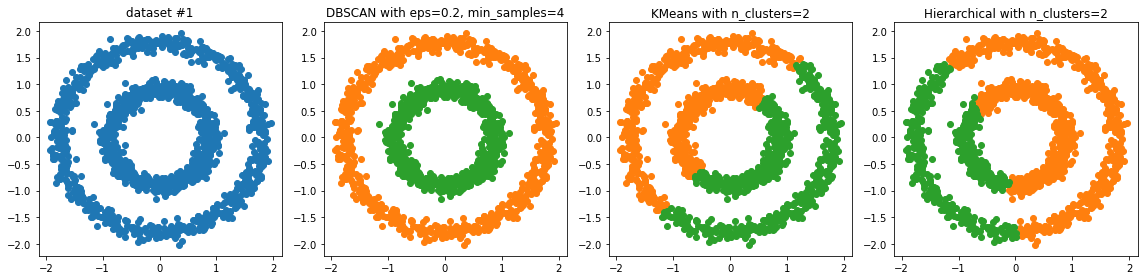

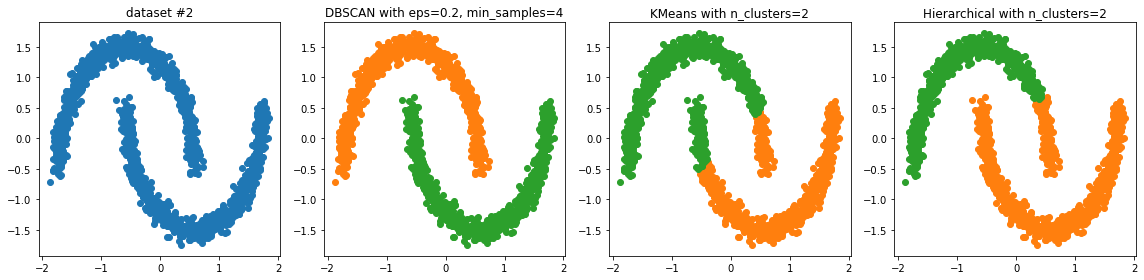

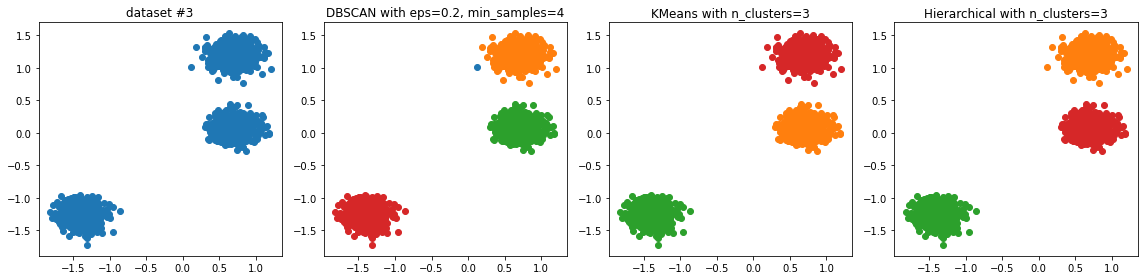

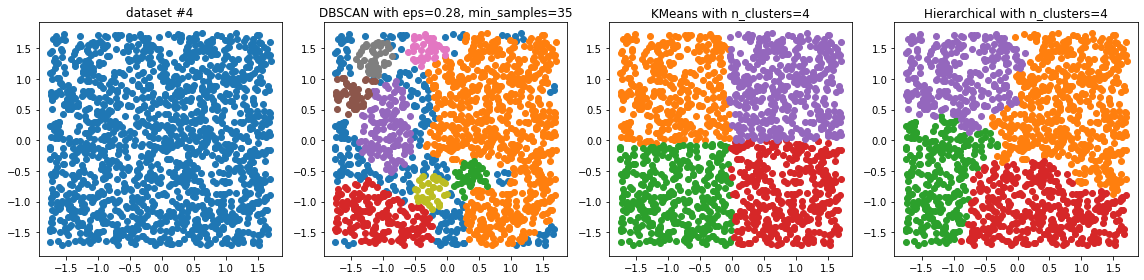

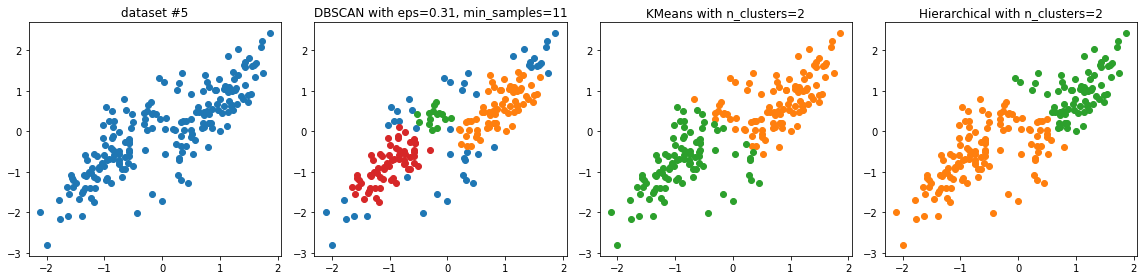

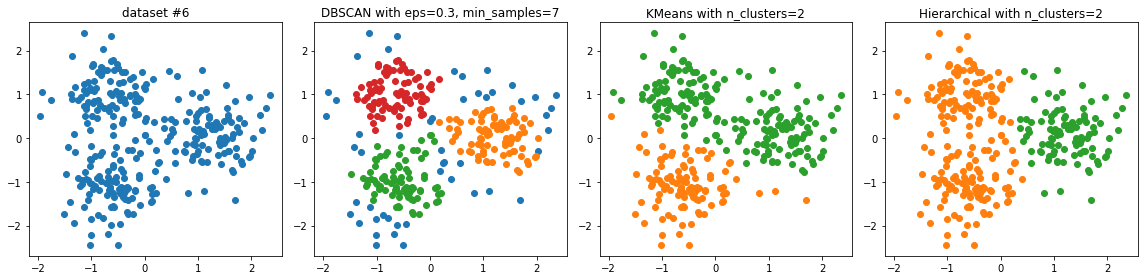

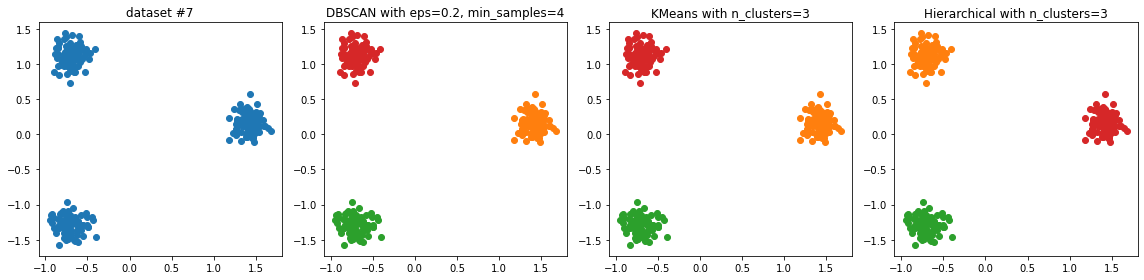

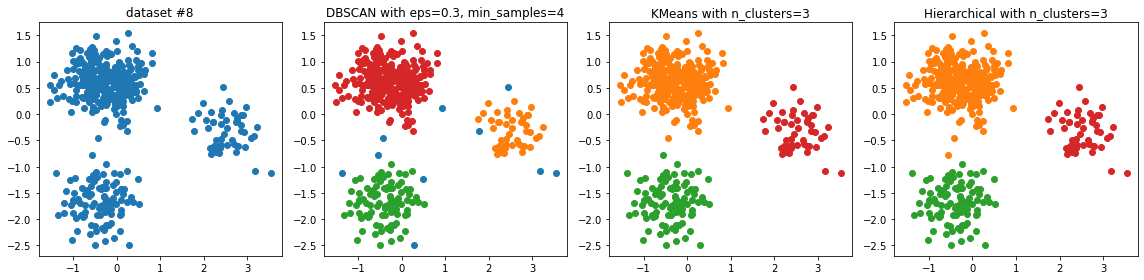

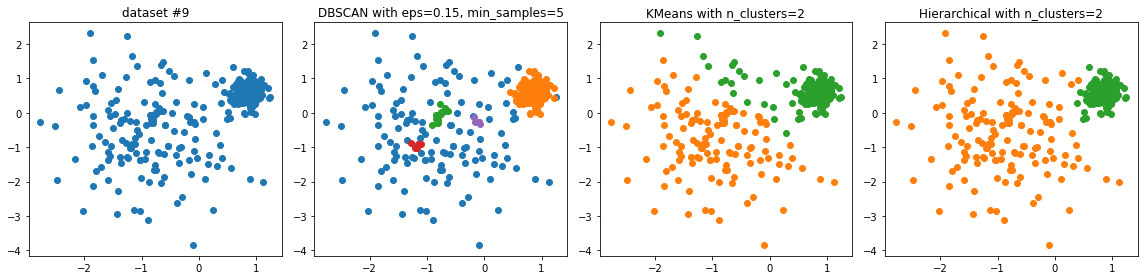

In [200]:
n_samples = 1500
dataset1 = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
dataset1=pd.DataFrame(dataset1[0])
dataset2 = sklearn.datasets.make_moons(n_samples=n_samples, noise=.05)
dataset2=pd.DataFrame(dataset2[0])

dataset3 = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=8)
dataset3=pd.DataFrame(dataset3[0])

dataset4= np.random.rand(n_samples, 2), None
dataset4=pd.DataFrame(dataset4[0])

dataset5= pd.read_csv("data/dataset5.csv")
dataset6= pd.read_csv("data/dataset6.csv")
dataset7= pd.read_csv("data/dataset7.csv")
dataset8= pd.read_csv("data/dataset8.csv")
dataset9= pd.read_csv("data/dataset9.csv")
datasets = [dataset1,dataset2,dataset3,dataset4,dataset5,dataset6,dataset7,dataset8,dataset9]

z = StandardScaler()

#parameters
DBSCAN_eps         = [0.2, 0.2, 0.2,0.28,0.31, 0.3, 0.2, 0.3, 0.15]
DBSCAN_min_samples = [  4,   4,   4,  35,  11,   7,   4,   4,   5]
KMmeans_n          = [  2,   2,   3,   4,   2,   2,   3,   3,   2]
Hierarchical_n     = [  2,   2,   3,   4,   2,   2,   3,   3,   2]

for i in range(len(datasets)):
    #do StandardScaler and plot data after scaling
    datasets[i] = pd.DataFrame(z.fit_transform(datasets[i]))
    fig = plt.figure(figsize = (16,4))
    ax0 = fig.add_subplot(1,4,1)
    ax0.scatter(datasets[i].iloc[:,[0]],datasets[i].iloc[:,[1]])
    ax0.set_title('dataset #{}'.format(i+1))
    
    
    #DBSCAN
    clustering = sklearn.cluster.DBSCAN(eps=DBSCAN_eps[i], min_samples=DBSCAN_min_samples[i]).fit(datasets[i])
    numberOfClusters = len(set(clustering.labels_))
    ax1 = fig.add_subplot(1,4,2)
    for j in range(-1,numberOfClusters):
        ax1.scatter(datasets[i][clustering.labels_==j][0],datasets[i][clustering.labels_==j][1])
    ax1.set_title('DBSCAN with eps={}, min_samples={}'.format(clustering.get_params()['eps'],clustering.get_params()['min_samples']))
    
    
    #KMmeans
    clustering = sklearn.cluster.KMeans(n_clusters = KMmeans_n[i]).fit(datasets[i])
    numberOfClusters = len(set(clustering.labels_))
    ax2 = fig.add_subplot(1,4,3)
    ax2.scatter([],[])
    for j in range(numberOfClusters):
        ax2.scatter(datasets[i][clustering.labels_==j][0],datasets[i][clustering.labels_==j][1])
    ax2.set_title('KMeans with n_clusters={}'.format(clustering.get_params()['n_clusters']))
   
    
    #Hierarchical 
    clustering = sklearn.cluster.AgglomerativeClustering(n_clusters = KMmeans_n[i]).fit(datasets[i])
    numberOfClusters = len(set(clustering.labels_))
    ax3 = fig.add_subplot(1,4,4)
    ax3.scatter([],[])
    for j in range(numberOfClusters):
        ax3.scatter(datasets[i][clustering.labels_==j][0],datasets[i][clustering.labels_==j][1])
    ax3.set_title('Hierarchical with n_clusters={}'.format(clustering.get_params()['n_clusters']))
    plt.tight_layout()
    plt.show()
    
    


1) plot all dataset
2) use standard scalar
3) use K-means, agglomerative, dbscan
4) plot dataset after clustering
5) Evaluate inertia,silhouette score,..........